#### Last Modified: Dec 13th, 2021 (Opal). 

# Shifted-OpInf on Jacchia-Bowman 2008 (JB2008) thermospheric density data (1999 – 2010)


In [1]:
import os
curr_dir = os.getcwd()
os.chdir("../")
print("current directory path = ", os.getcwd())

current directory path =  /Users/oissan/PycharmProjects/Space-Weather-ROM


In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat
from scipy import linalg
import pandas as pd
import os
from matplotlib.pyplot import subplots, show
import cv2
%matplotlib inline  

# Reduced order model and data source
datasource = 'JB2008_9910' # Using data from 1 solar cycle (12 years)

In [3]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 13}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 

### Import Dataset from https://drive.google.com/drive/folders/1GqPuul52wvNU9ErN7gM_uoEv8tq6o3h0

In [4]:
# Density grid 
localSolarTimes = np.linspace(0,24,24)
latitudes = np.linspace(-87.5,87.5,20)
altitudes = np.linspace(100,800,36)
nofAlt = altitudes.shape[0]
nofLst = localSolarTimes.shape[0]
nofLat = latitudes.shape[0]

In [5]:
# Load density data
if datasource == "JB2008_9910":
    # Dimension = (24 local solar time, 20 latitude, 36 altitude).flatten() * #training_data
    training_data = np.load('Data/Data_JB/JB2008_9910_original.npy')
    
    # Load Space weather data
    # SW data contains [doy; UThrs; F10; F10B; S10; S10B; XM10; XM10B; Y10; Y10B; DSTDTC; GWRAS; SUN(1); SUN(2)]
    solar_training_data = np.load('Data/Data_JB/JB2008_9910_solar.npy')

else:
    print("Invalid data source. Please change your settings")

In [6]:
training_data.shape

(17280, 103404)

In [7]:
# Load density data for prediction evaluation
if datasource == "JB2008_9910":
    # Dimension = (24 local solar time, 20 latitude, 36 altitude).flatten() * #evaluation_data
    data_eval_temp = loadmat('Data/Data_JB/2000_JB2008_density.mat')
    data_eval= data_eval_temp['densityData']
    
    # Load Space weather data
    # SW data contains [doy; UThrs; F10; F10B; S10; S10B; XM10; XM10B; Y10; Y10B; DSTDTC; GWRAS; SUN(1); SUN(2)]
    solar_data_eval_temp = loadmat('Data/Data_JB/2000_JB2008_SW.mat')
    solar_data_eval = solar_data_eval_temp['SWdata']
    
else:
    print("Invalid data source. Please change your settings")
    
data_eval_df = pd.DataFrame(data_eval).transpose()
solar_eval_df = pd.DataFrame(solar_data_eval)

In [8]:
data_eval_df.shape

(8784, 17280)

# Compute variation in log density around mean
Center and take log10 of the training density data.

Note: POD model performed better after this scaling.

In [30]:
densityDataFull = training_data
densityDataMeanLog = np.log10(np.mean(densityDataFull, axis=1))  
densityDataMeanLog = densityDataMeanLog[:, np.newaxis]
densityDataVarLog = np.log10(densityDataFull) - densityDataMeanLog

In [31]:
densityDataVarLog.shape

(17280, 103404)

In [33]:
# Dimension = (24 local solar time, 20 latitude, 36 altitude).flatten() * #training_data

In [48]:
photo = densityDataVarLog[:, 0].reshape(24,20,36, order='F')

In [110]:
photo.shape

(24, 20, 36)

/var/folders/tt/hgb4_vc13z77x5wpt5lzk5j40000gn/T/ipykernel_4113/3852188322.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10, 4))


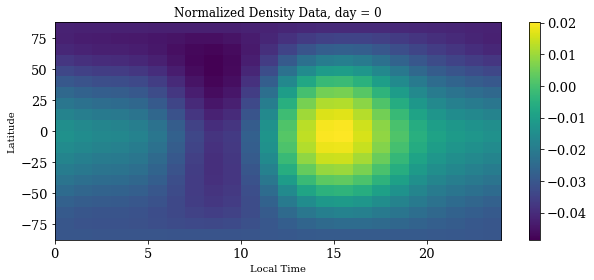

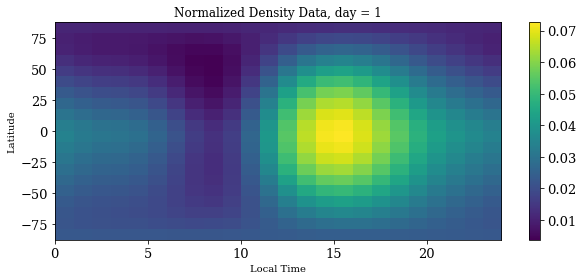

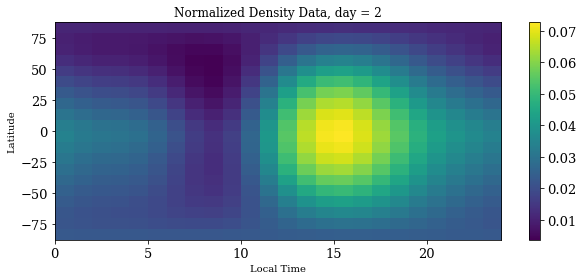

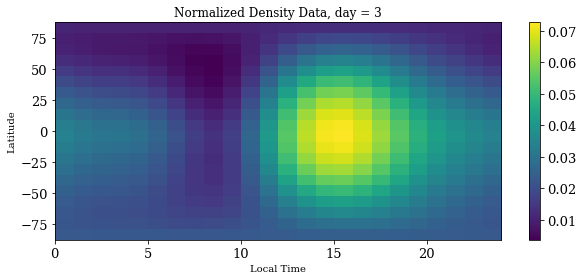

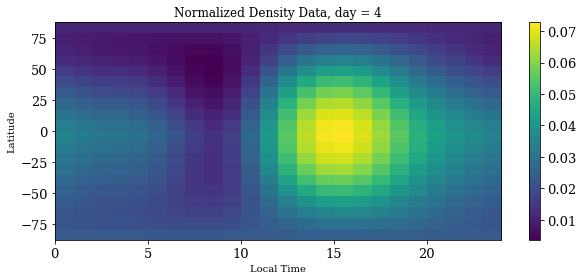

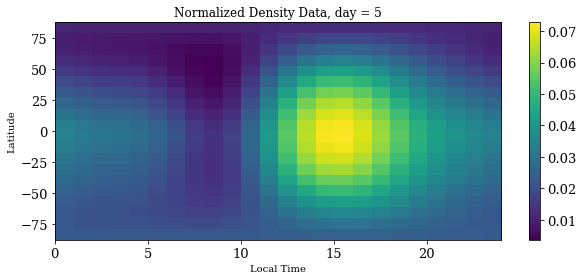

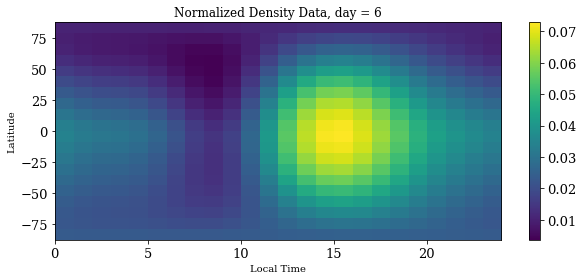

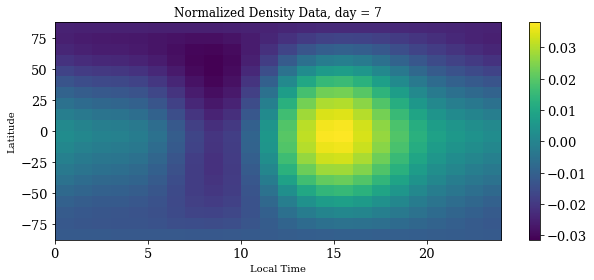

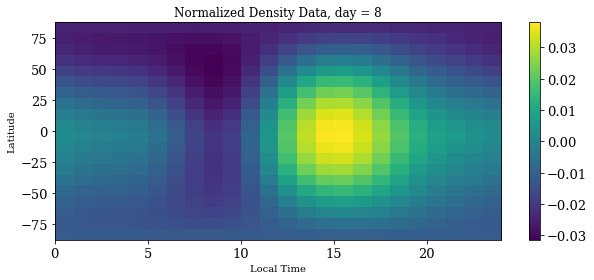

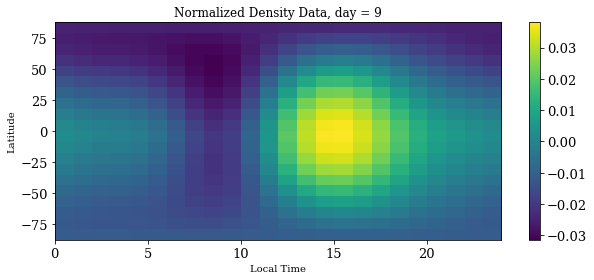

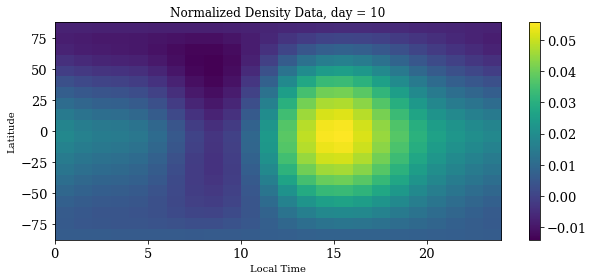

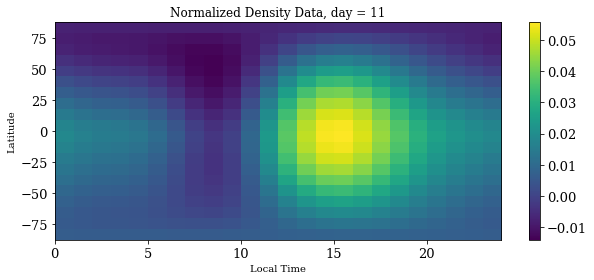

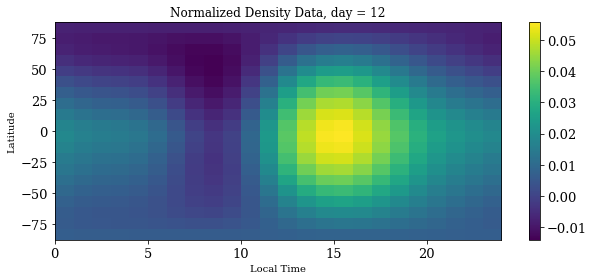

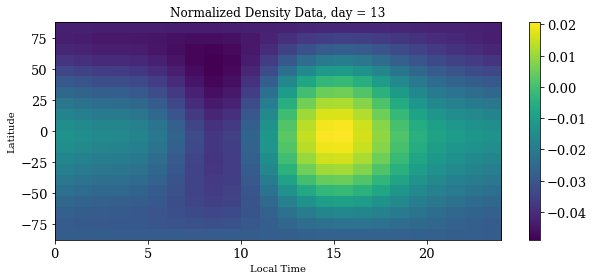

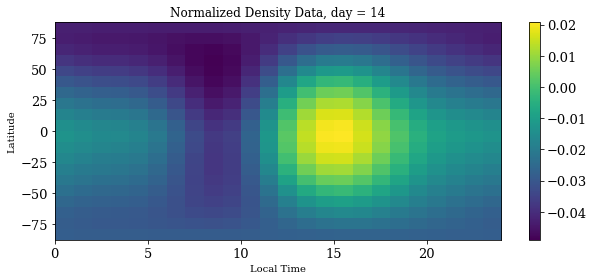

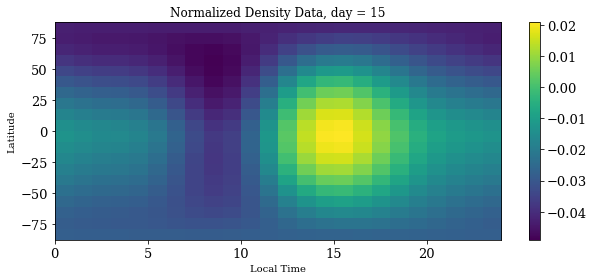

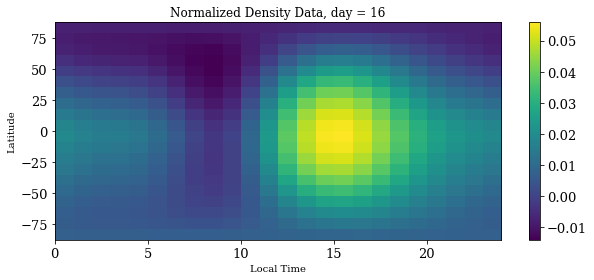

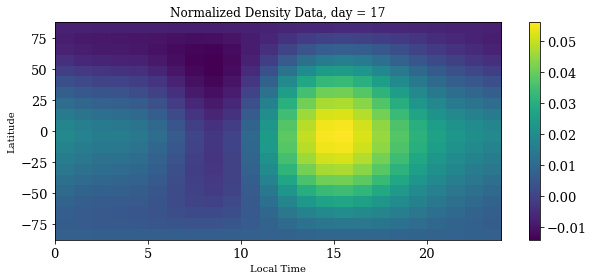

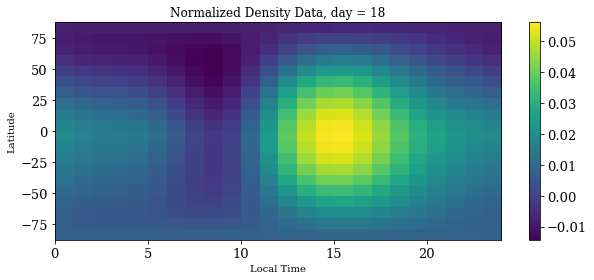

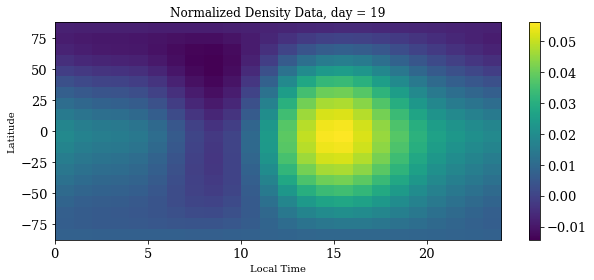

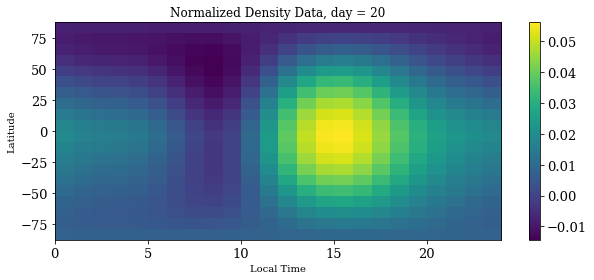

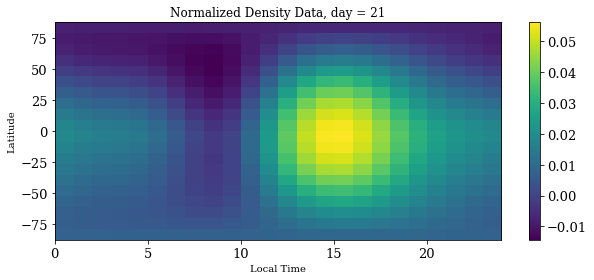

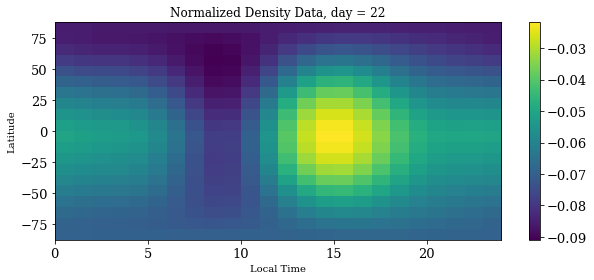

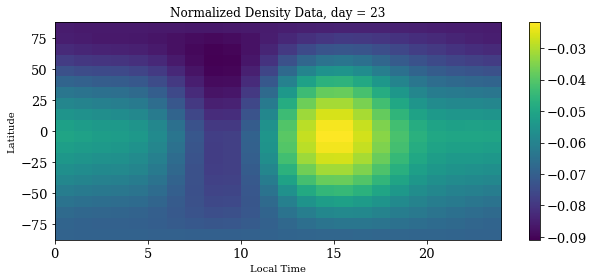

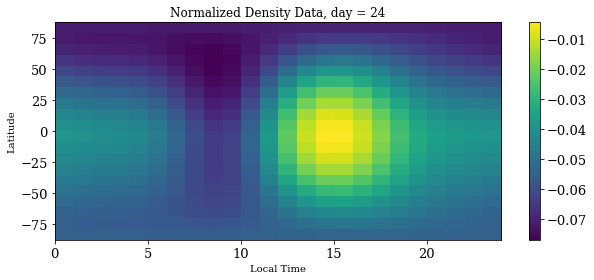

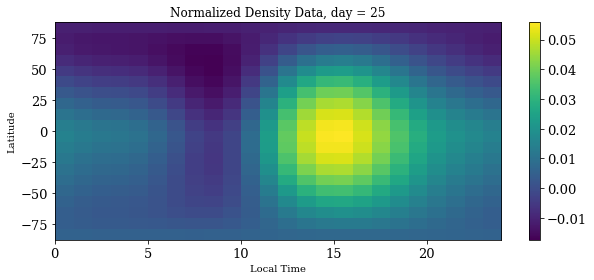

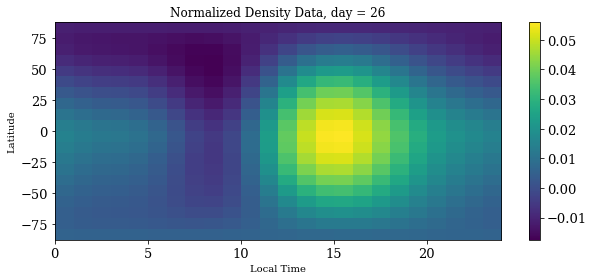

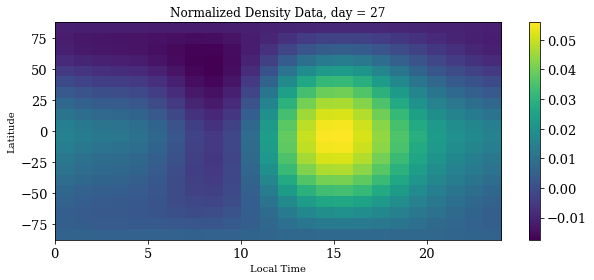

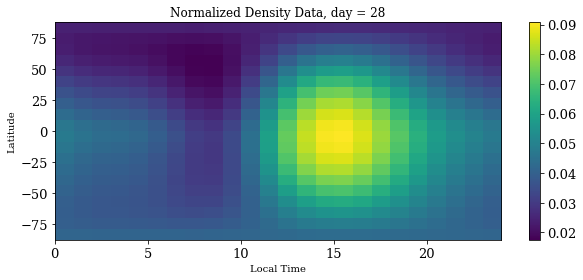

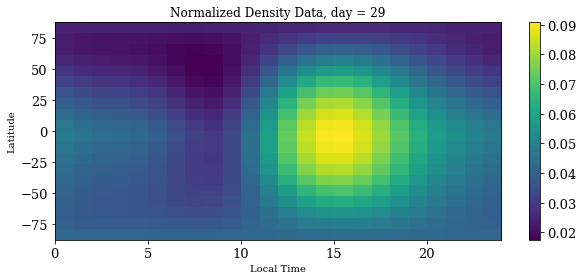

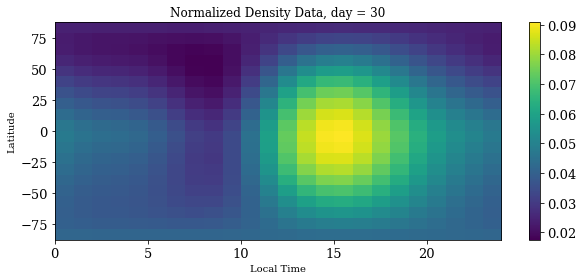

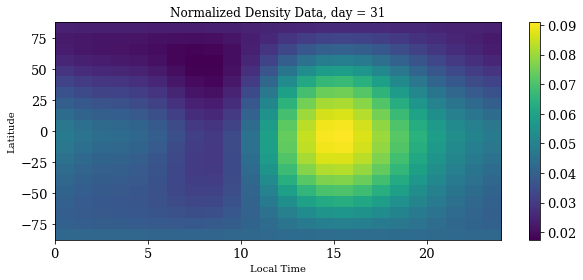

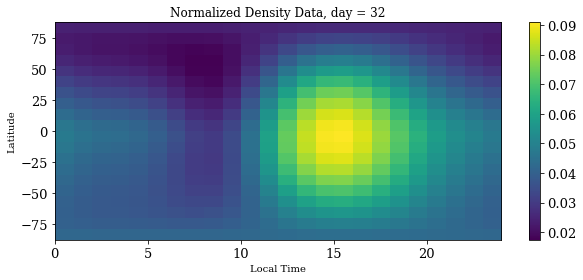

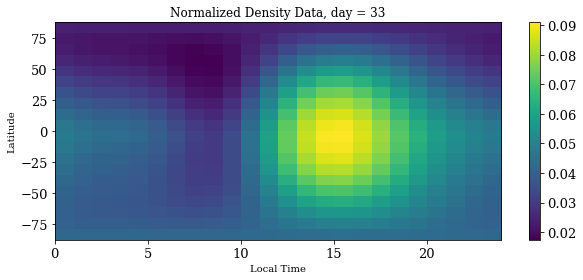

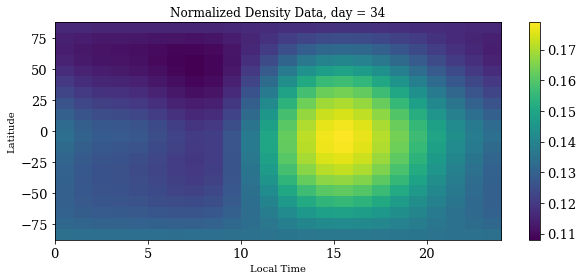

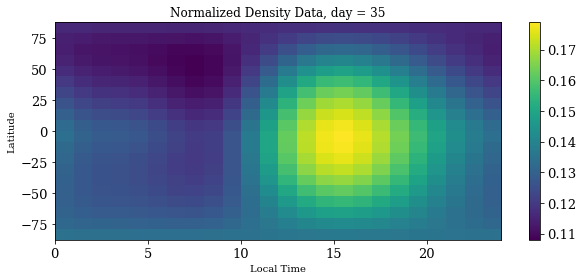

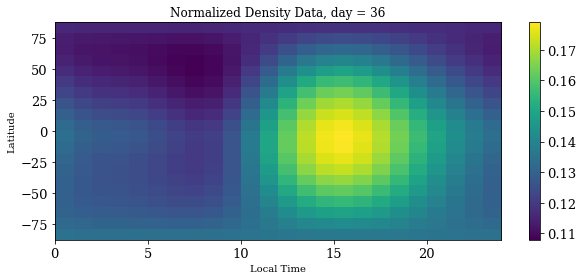

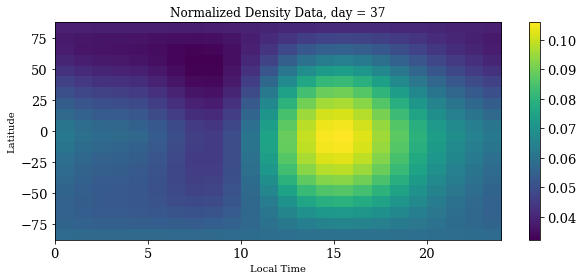

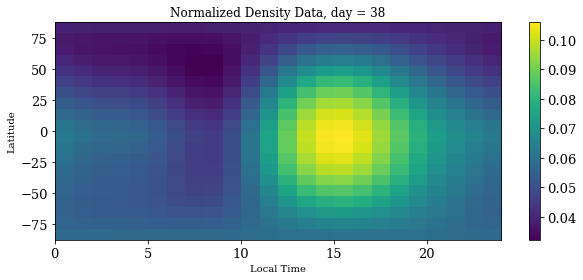

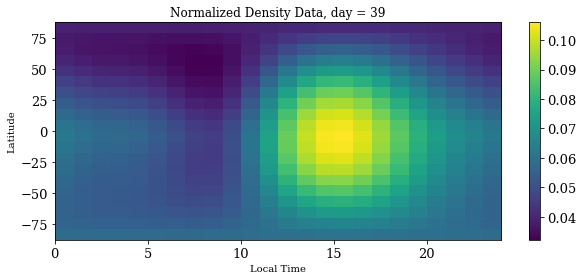

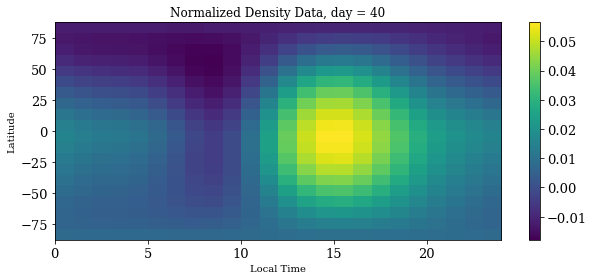

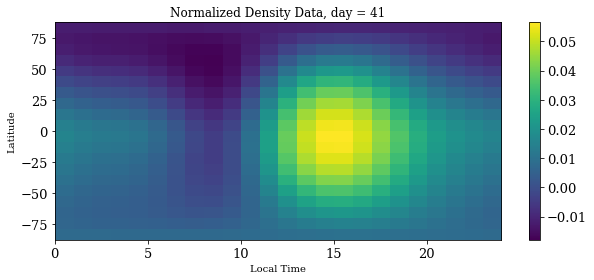

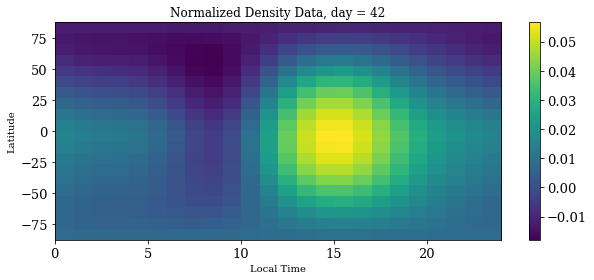

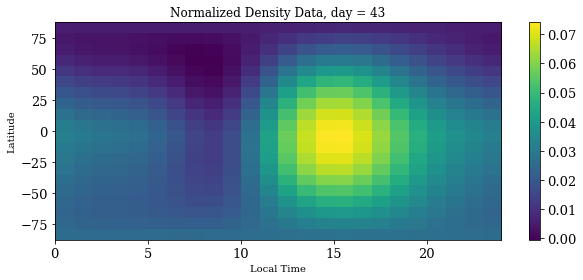

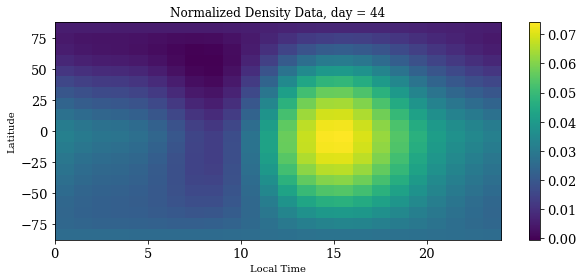

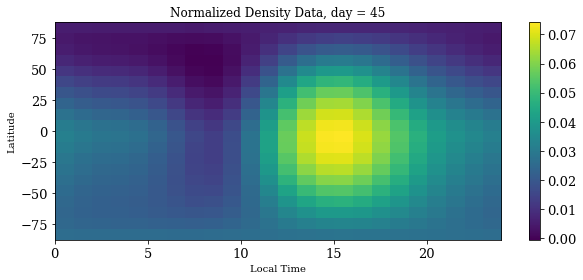

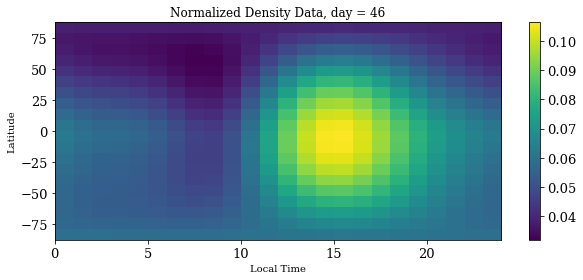

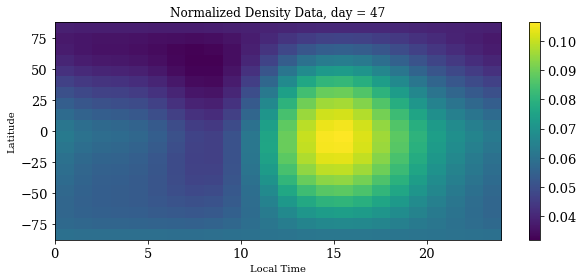

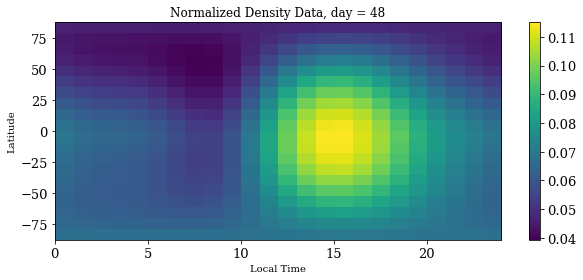

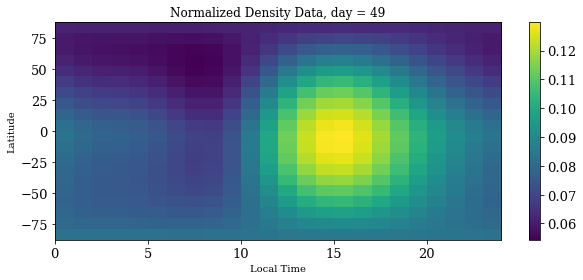

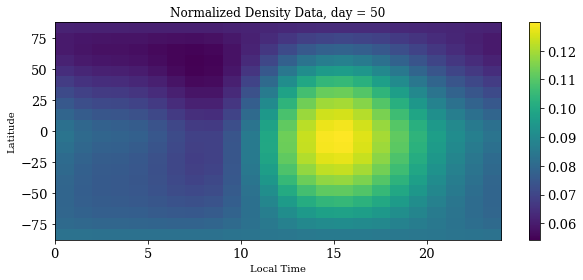

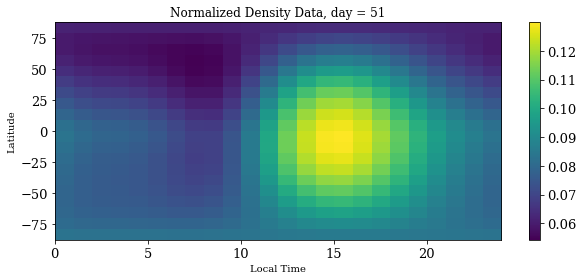

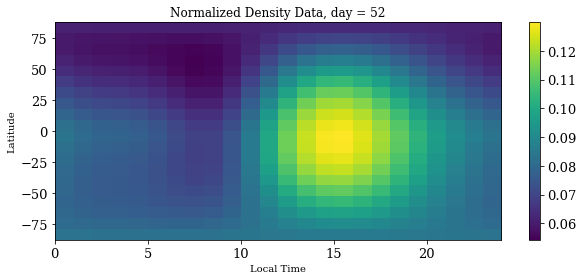

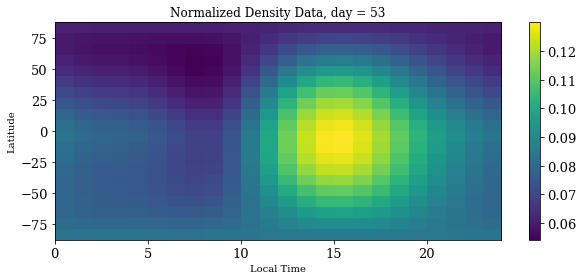

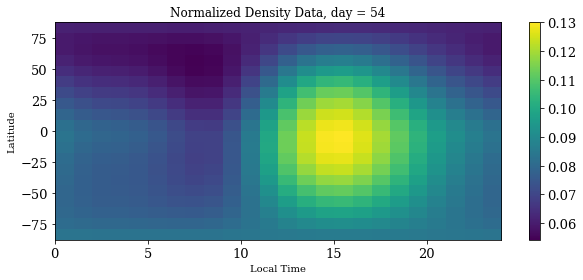

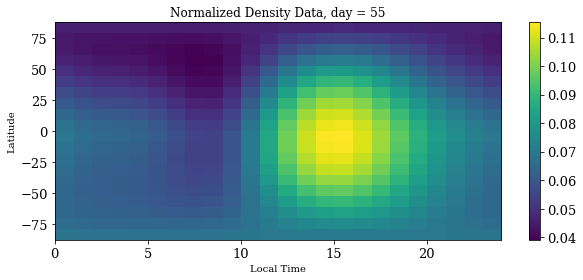

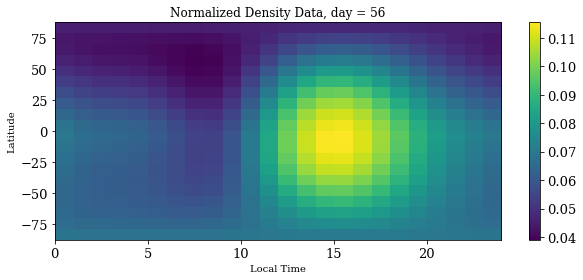

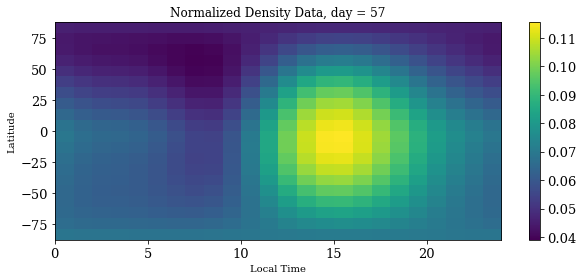

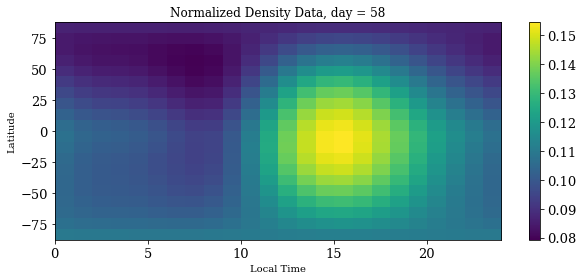

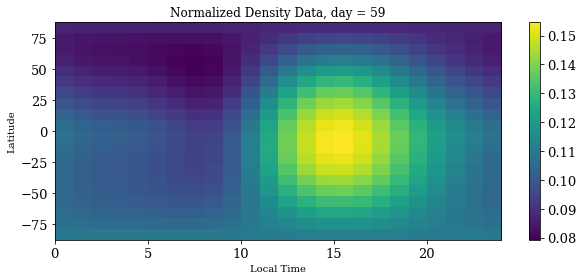

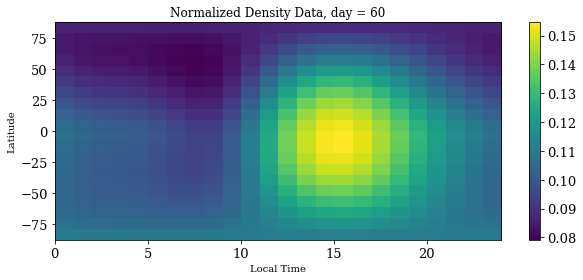

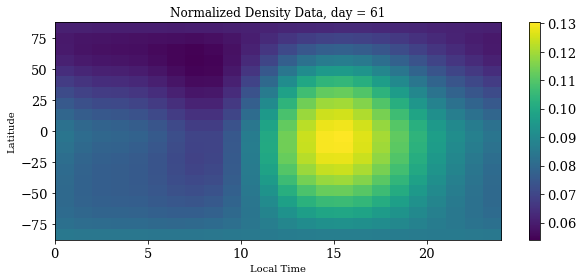

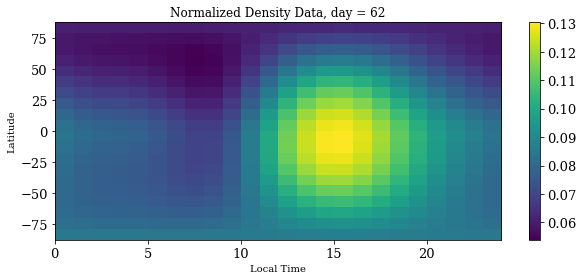

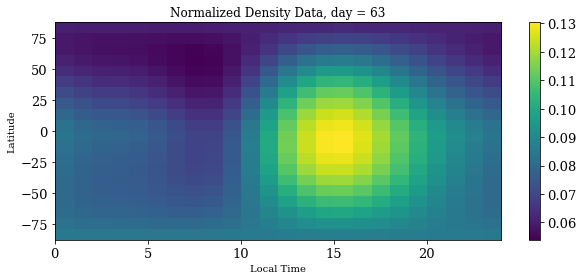

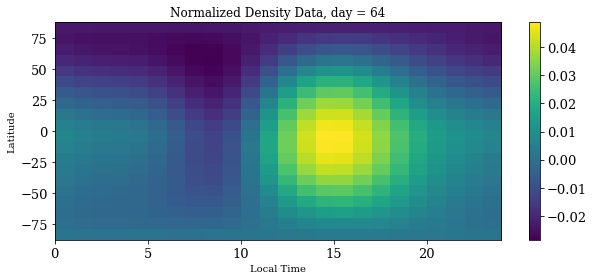

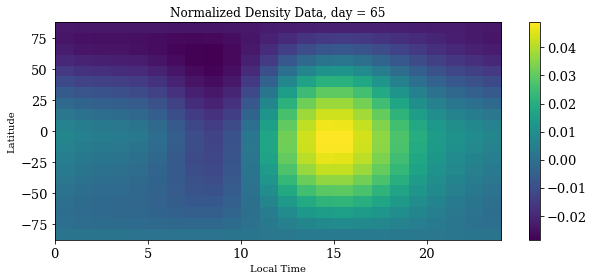

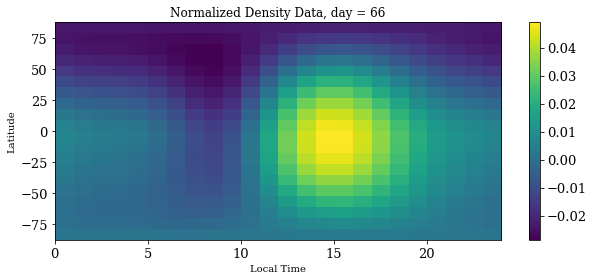

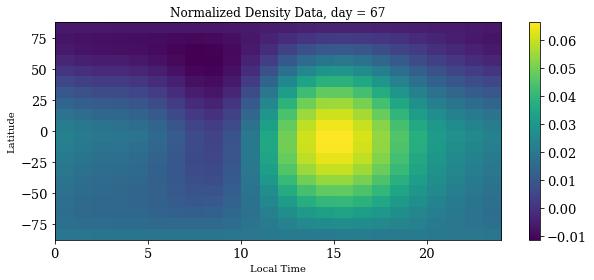

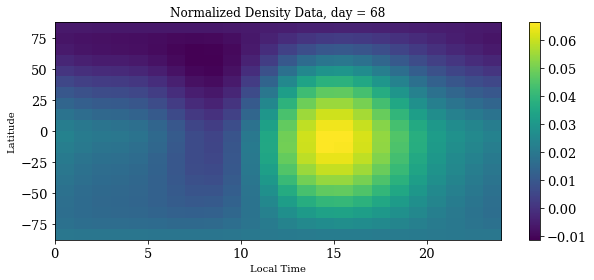

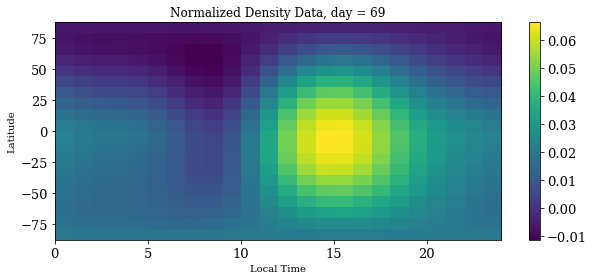

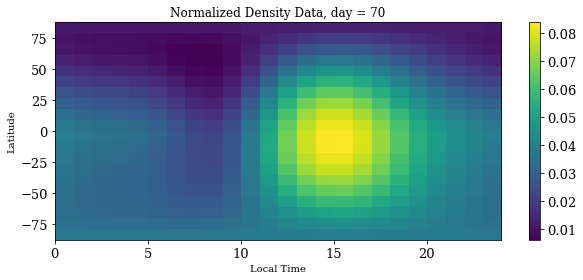

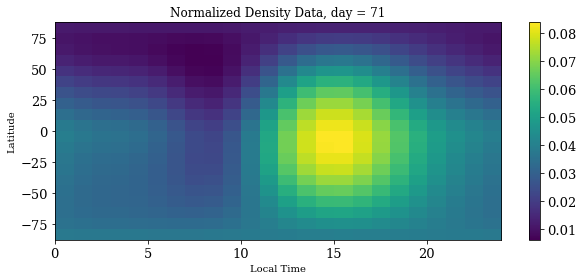

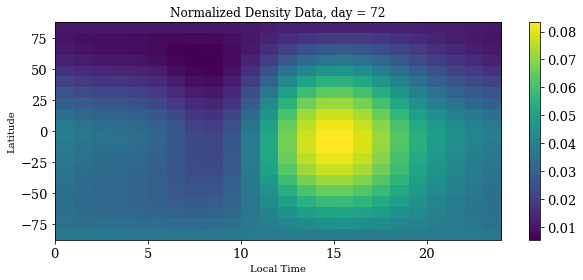

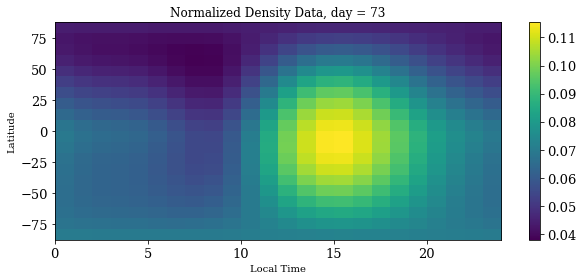

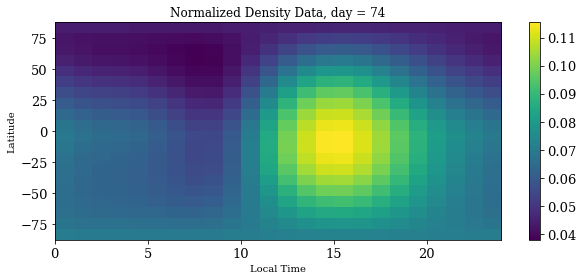

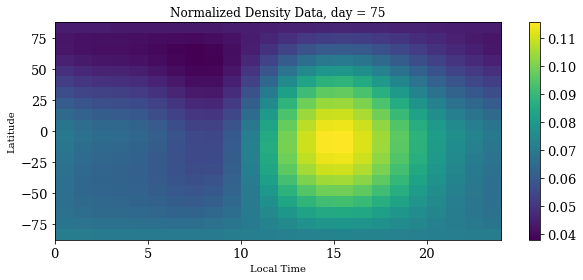

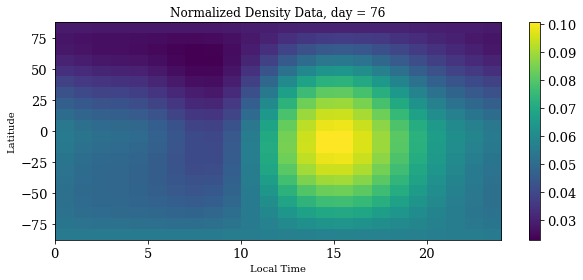

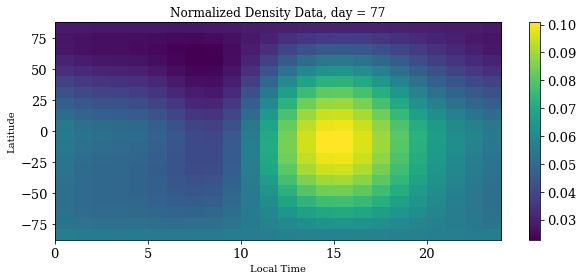

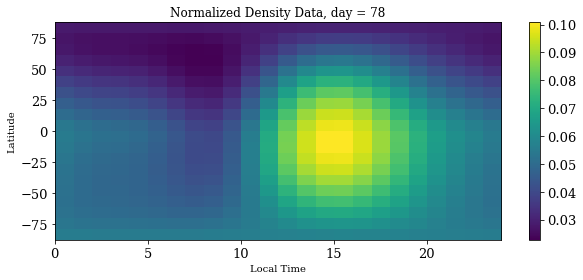

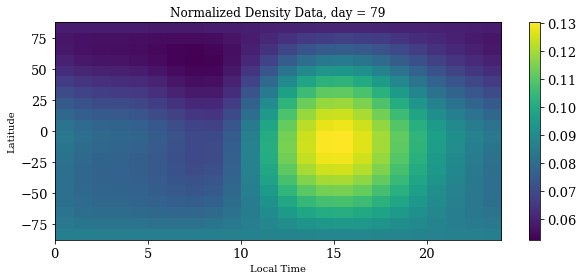

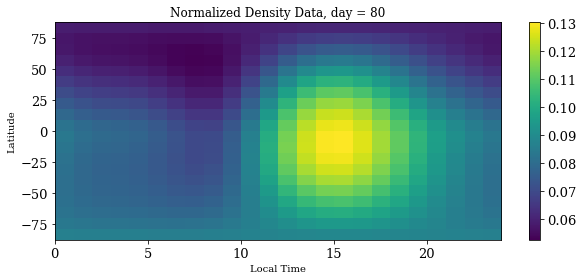

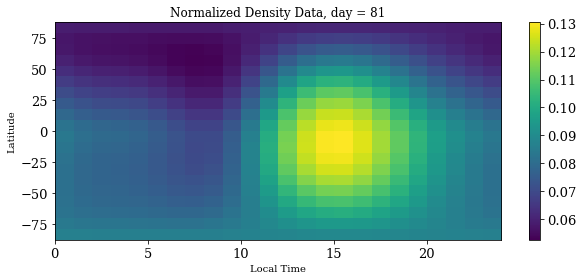

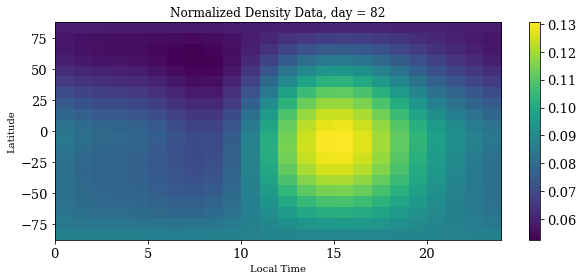

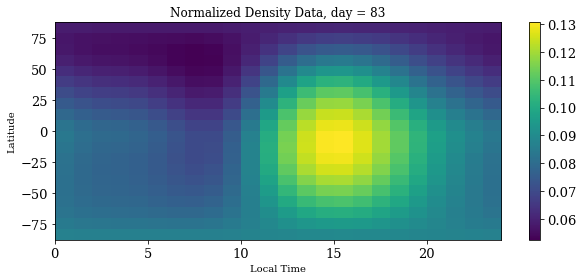

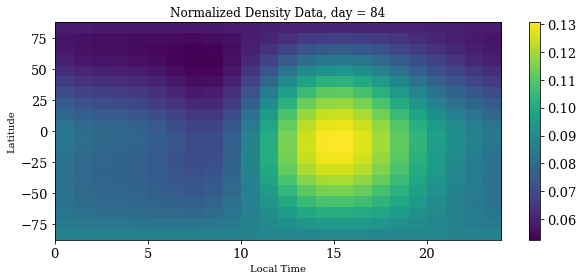

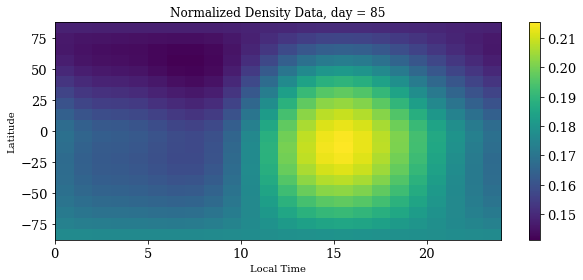

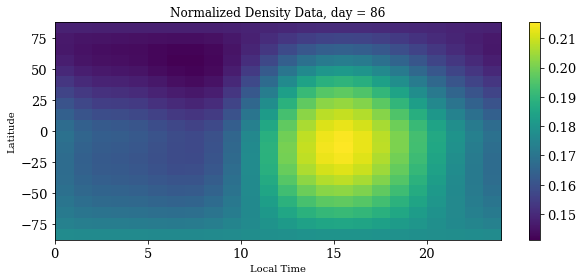

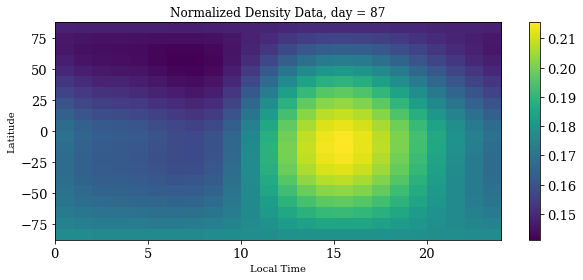

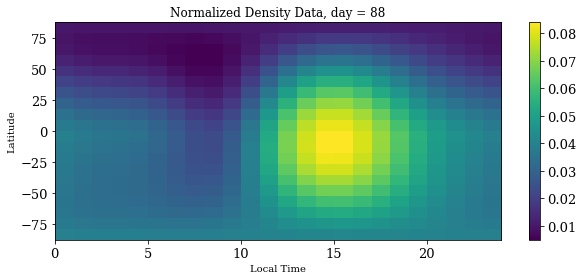

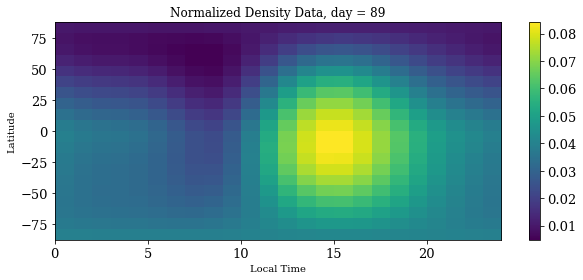

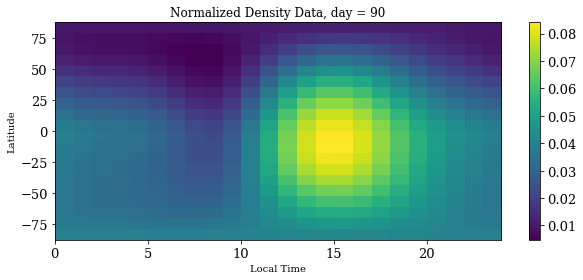

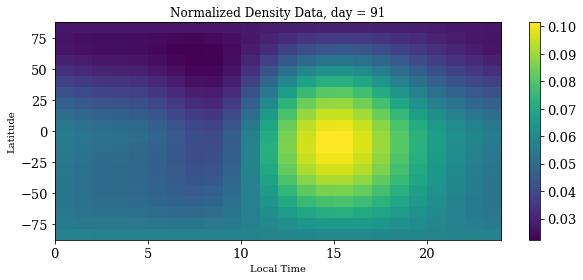

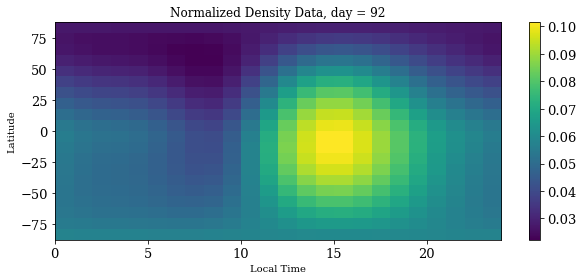

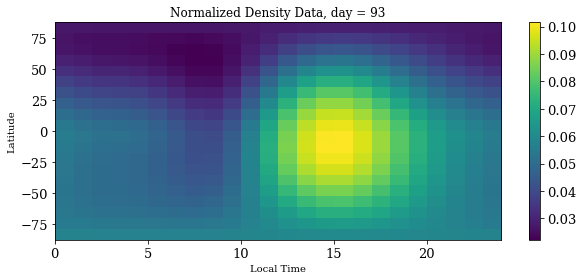

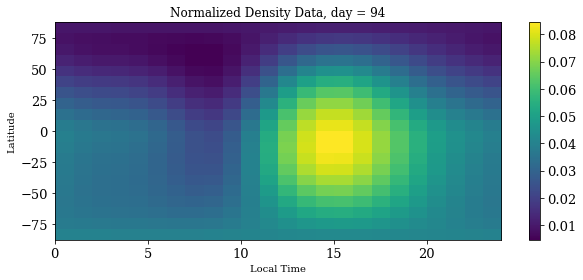

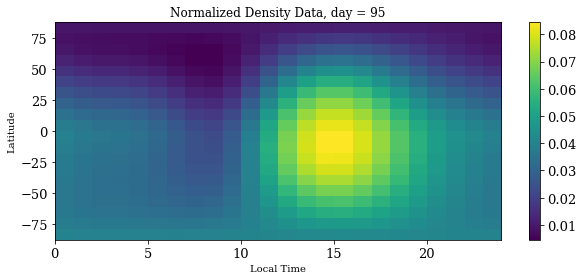

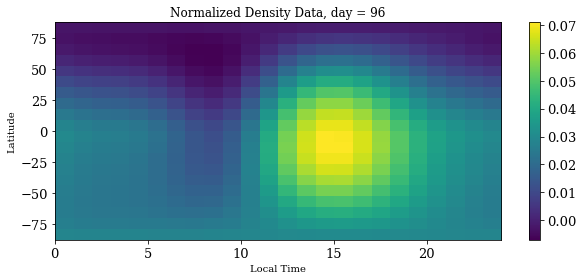

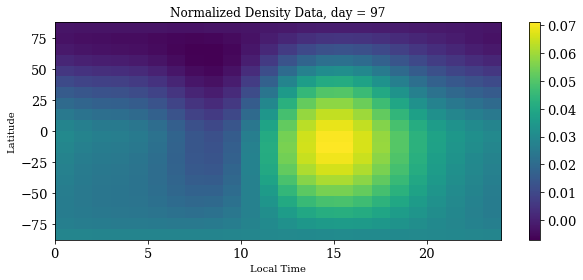

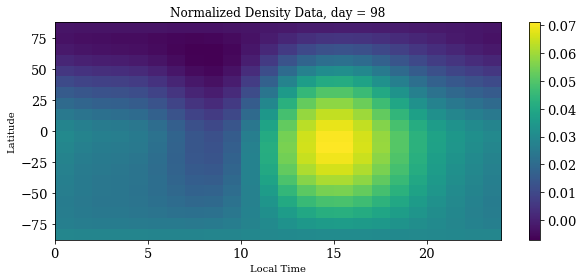

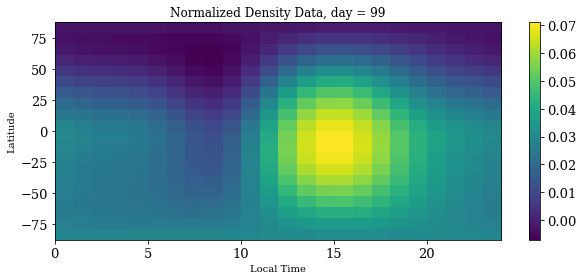

In [144]:
for kk, i in enumerate(np.arange(0, 100, 1)):
    # data snapshots.
    photo = densityDataVarLog[:, kk].reshape(24,20,36, order='F')
    # plot contours. 
    fig, ax = plt.subplots(figsize=(10, 4))
    img = ax.imshow(photo[:, :, -1].T, extent=[localSolarTimes[0], localSolarTimes[-1], latitudes[0], latitudes[-1]], 
                   cmap="viridis", aspect="auto")
    cbar = fig.colorbar(img, ax=ax)
    ax.set_ylabel("Latitude")
    ax.set_xlabel("Local Time")
    ax.set_title('Normalized Density Data, day = {}'.format(i))
    file_name = "JB/figs/animation/fig_" + str(kk) + ".png"
    fig.savefig(file_name, dpi=300)

In [166]:
SaveVid = True

if SaveVid:
    # choose codec according to format needed
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter("JB/figs/JB_vid_4.mov", fourcc, 5, (3000,1200))
    # loop over save images. 
    for j in range(kk):
        file_name = "JB/figs/animation/fig_" + str(j) + ".png"
        img = cv2.imread(file_name)
        video.write(img)
    cv2.destroyAllWindows()
    video.release()

/var/folders/tt/hgb4_vc13z77x5wpt5lzk5j40000gn/T/ipykernel_4113/1087720052.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10, 4))


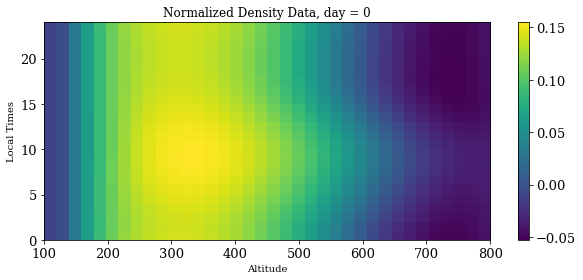

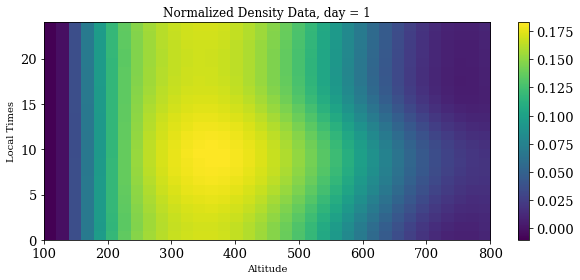

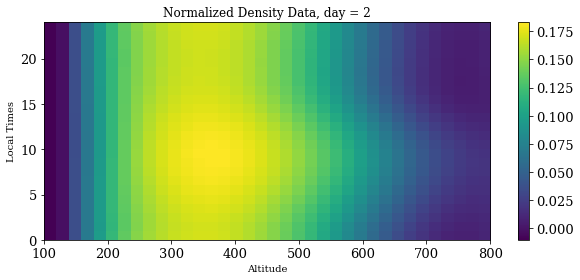

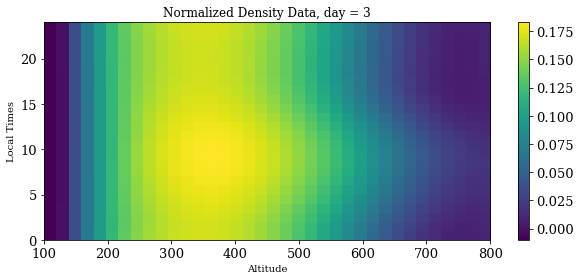

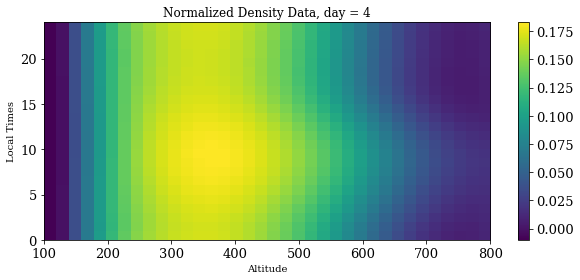

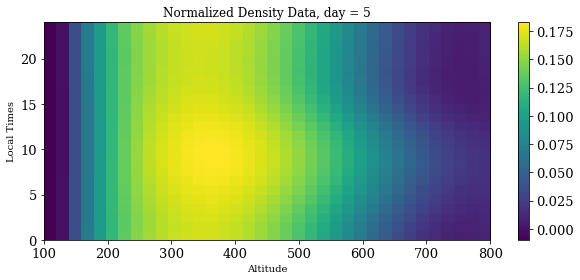

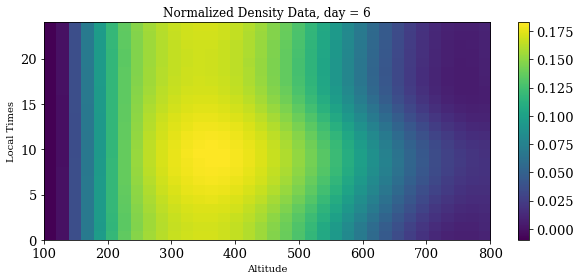

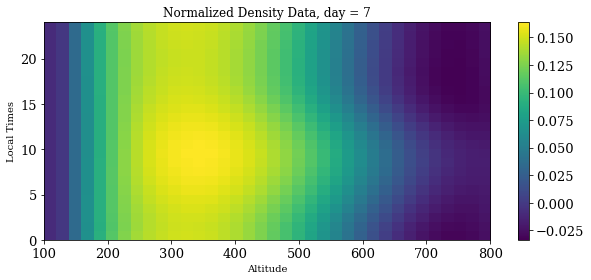

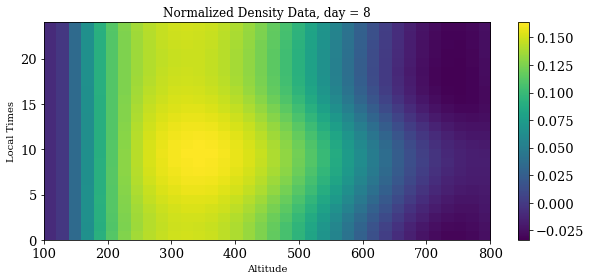

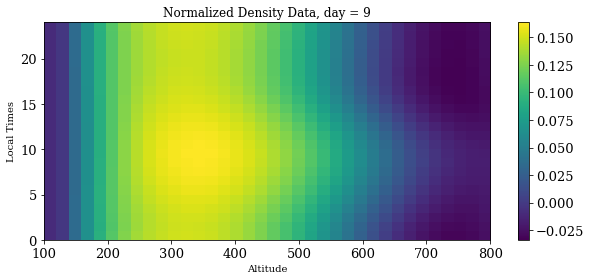

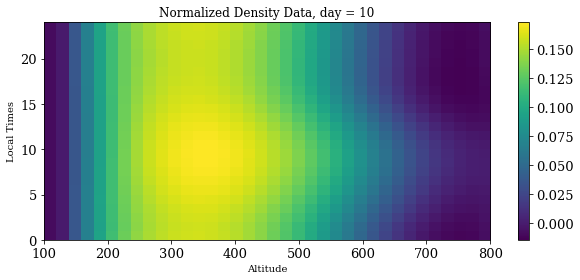

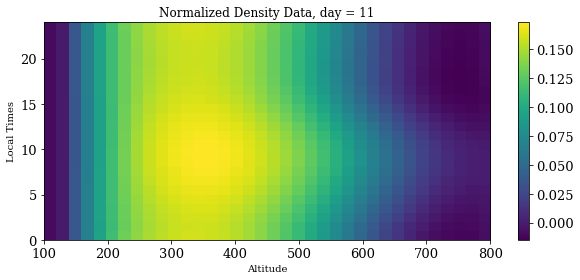

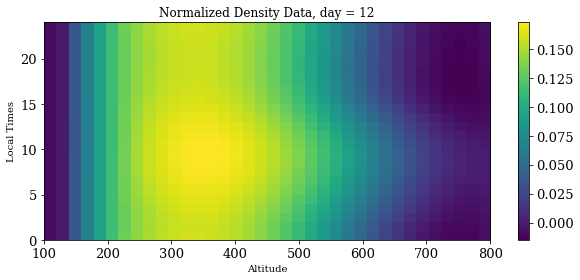

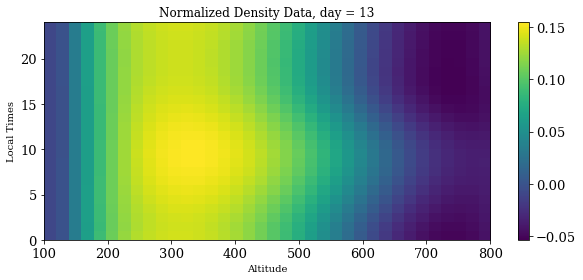

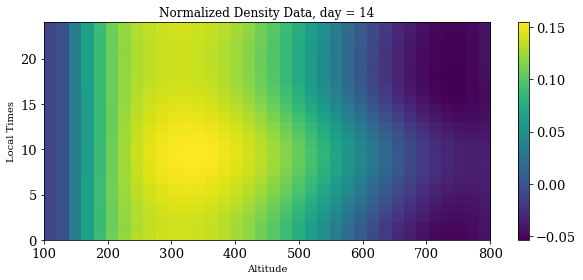

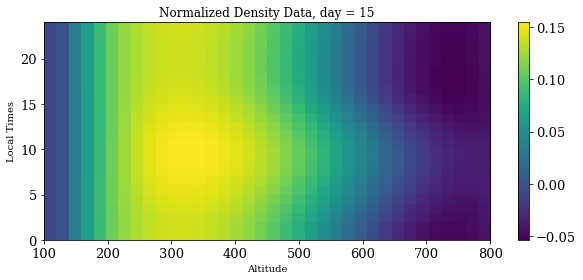

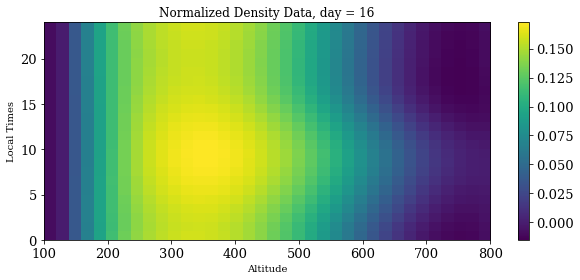

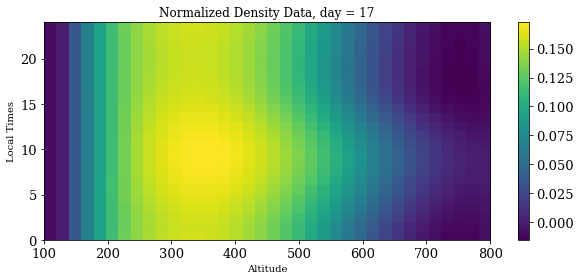

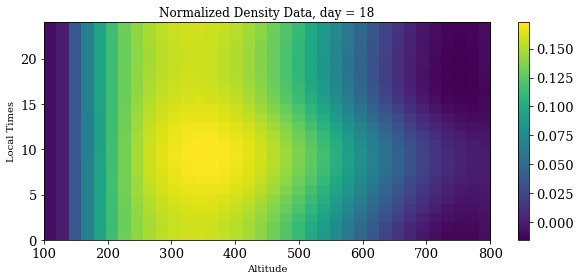

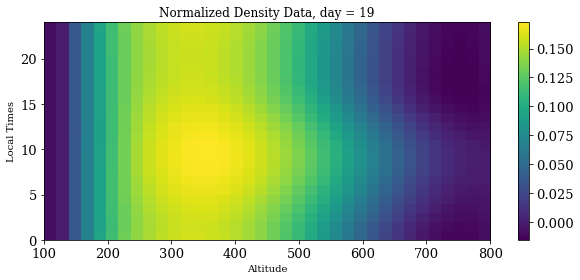

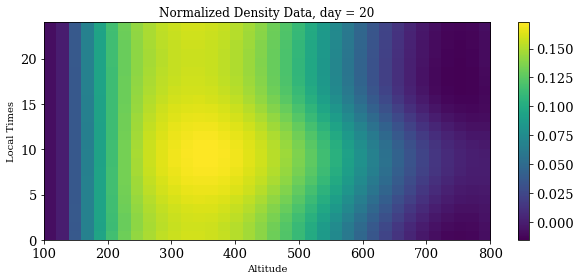

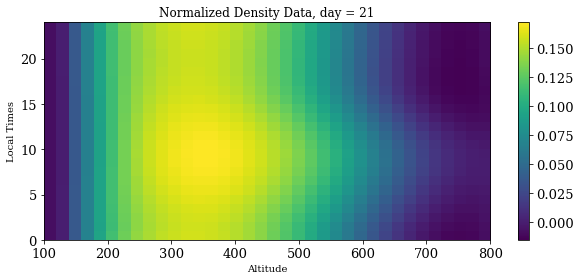

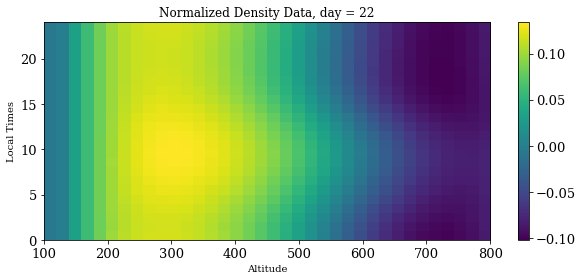

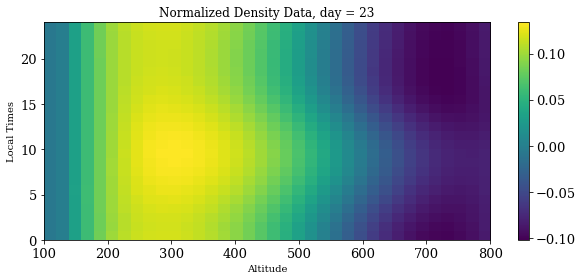

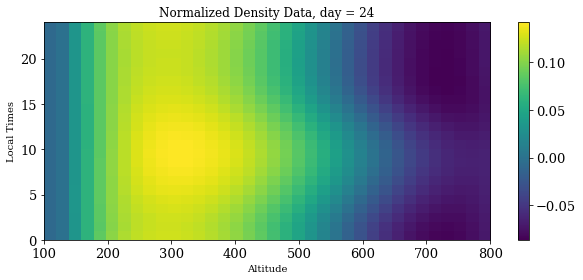

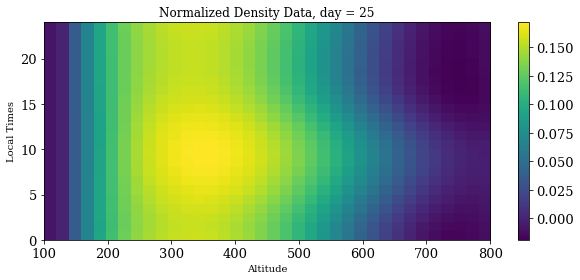

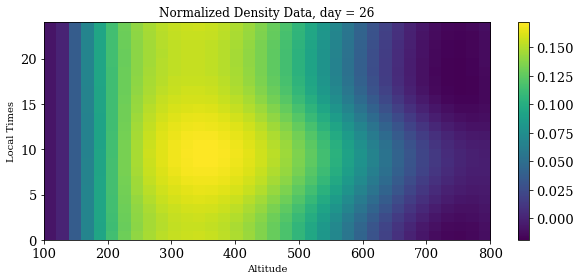

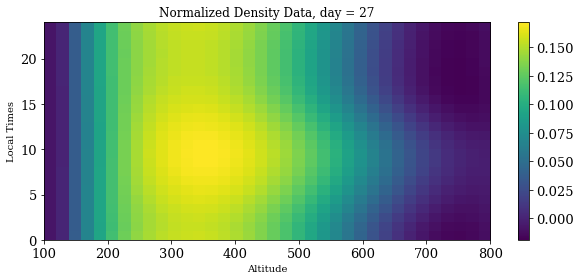

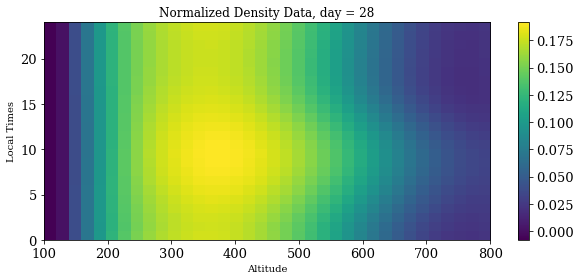

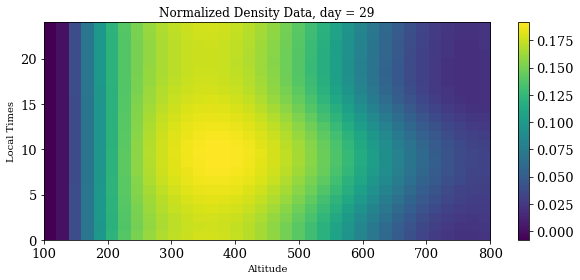

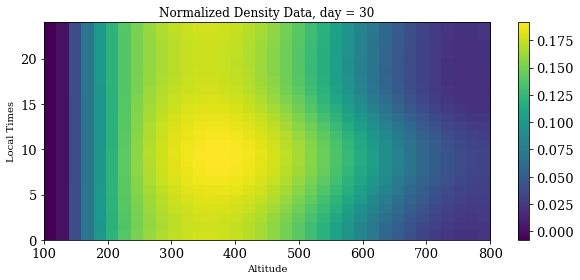

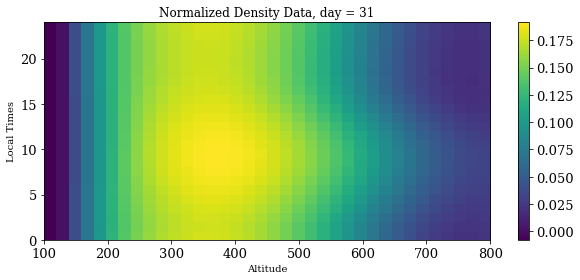

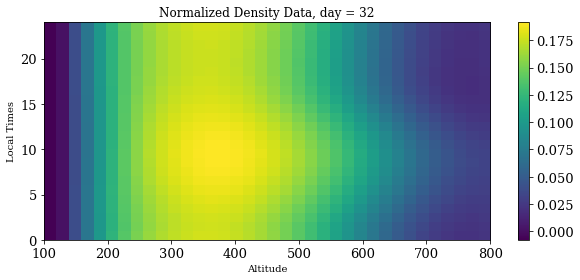

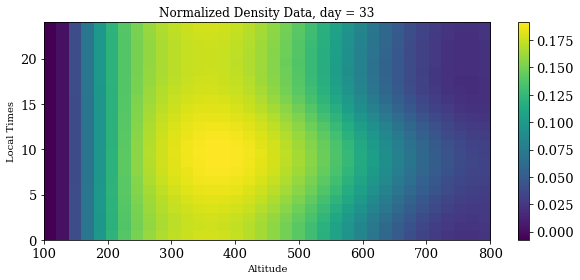

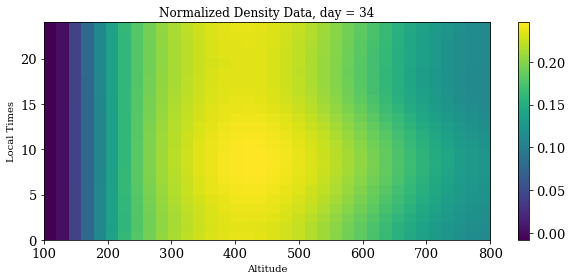

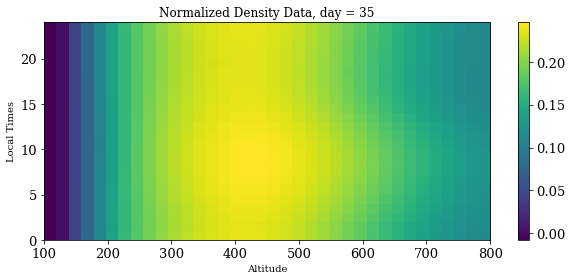

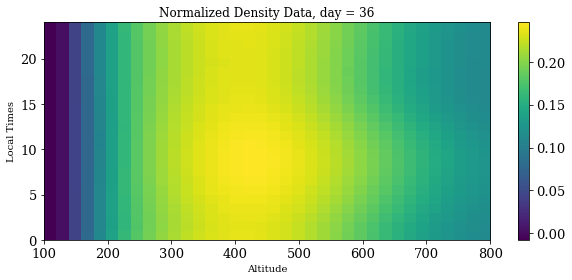

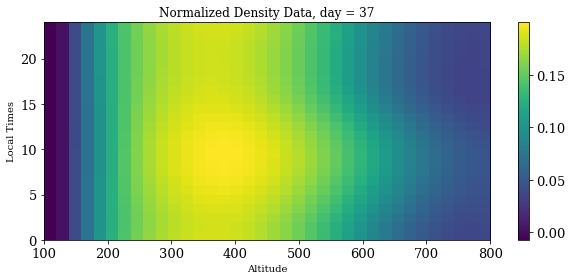

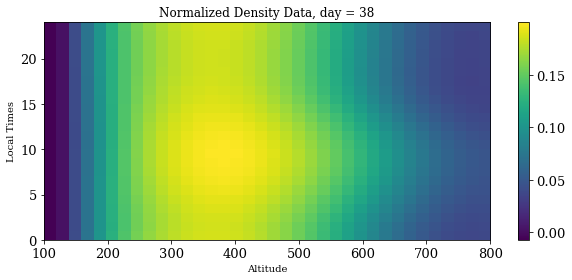

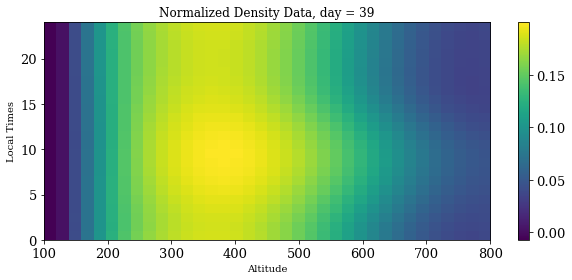

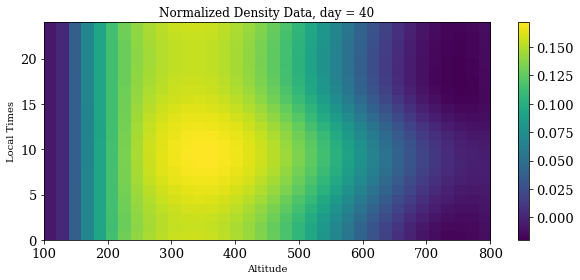

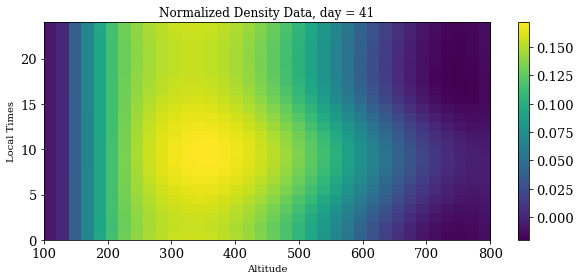

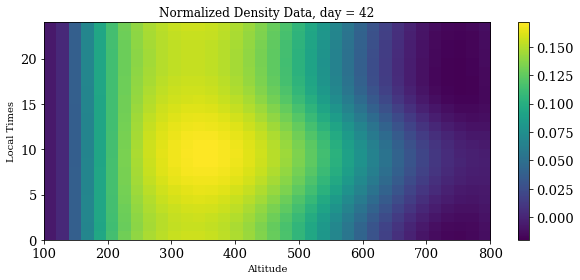

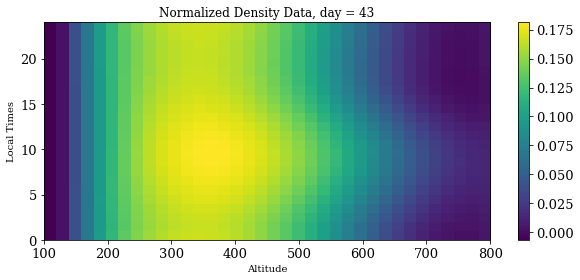

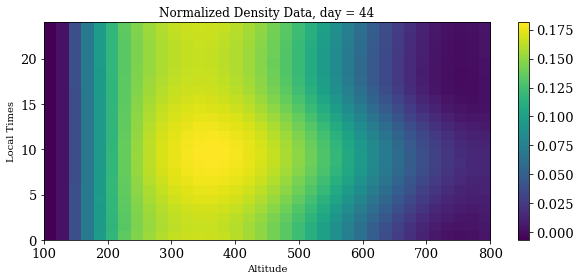

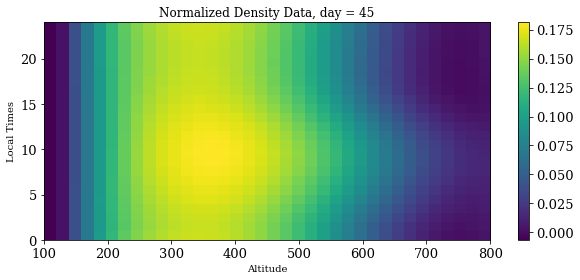

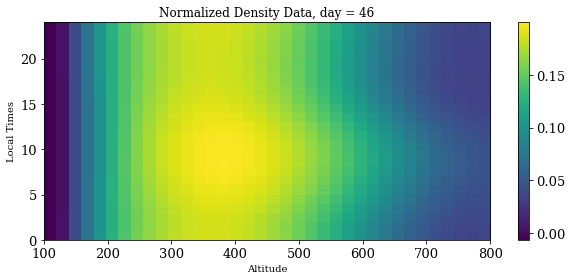

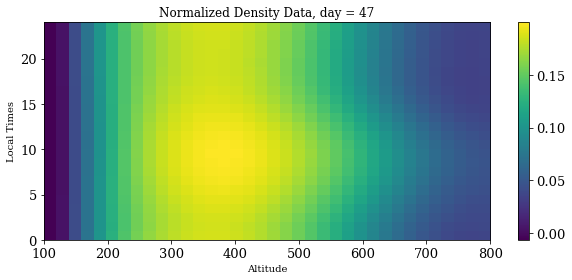

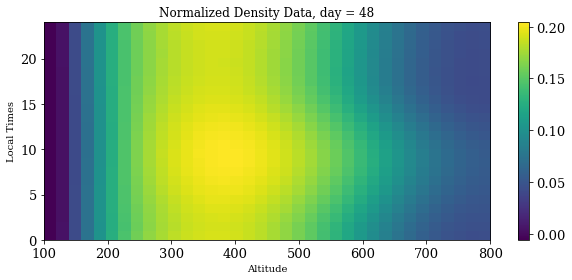

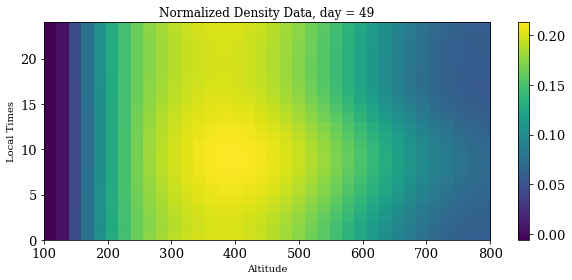

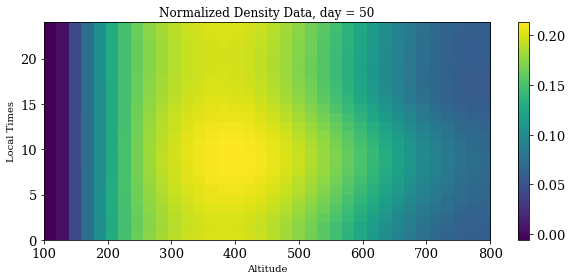

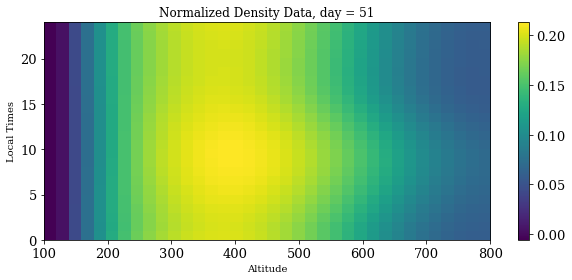

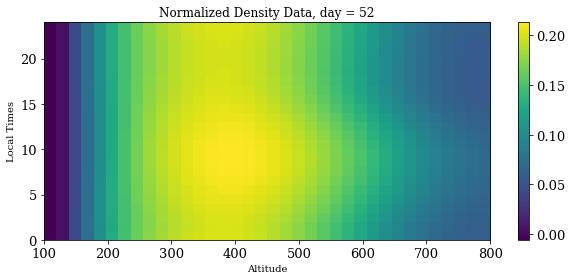

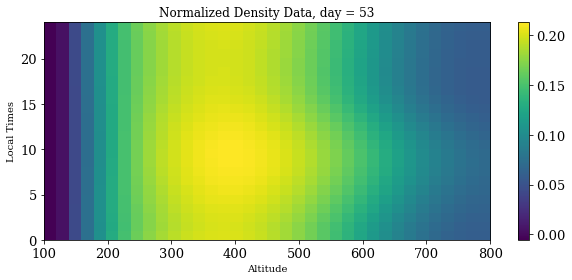

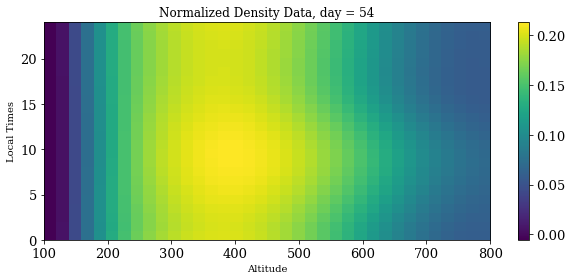

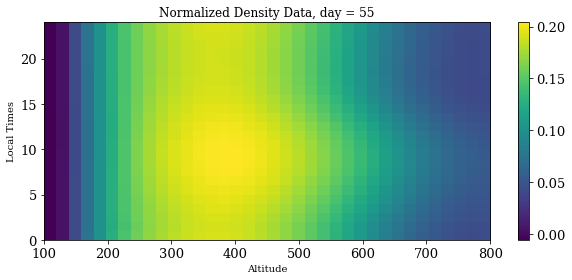

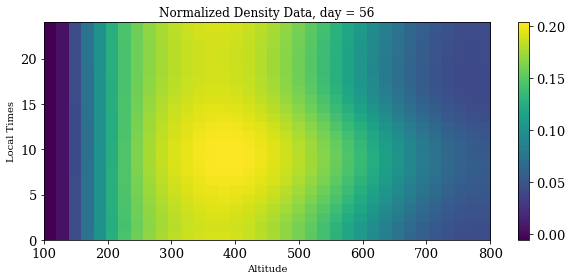

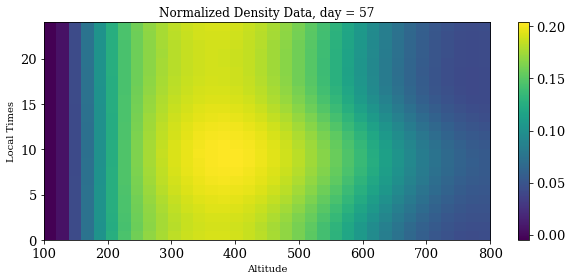

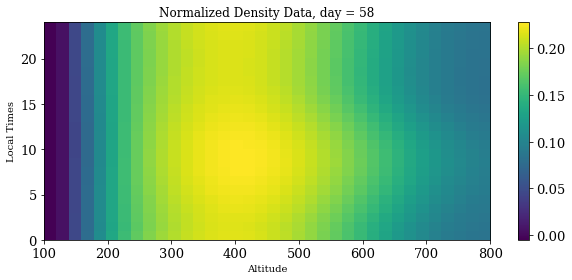

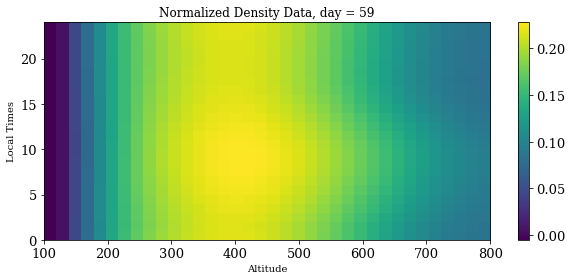

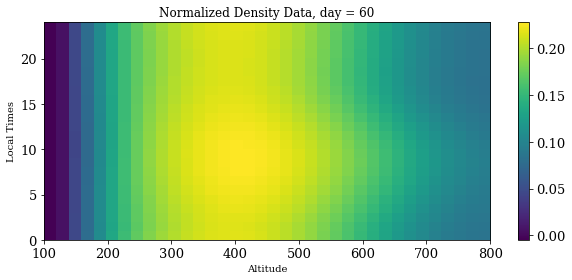

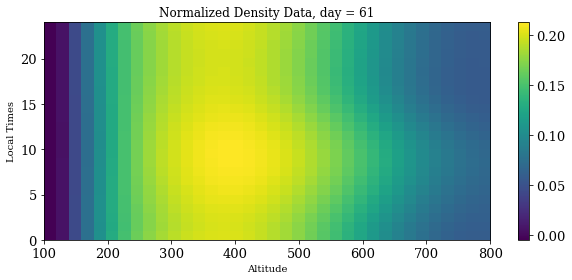

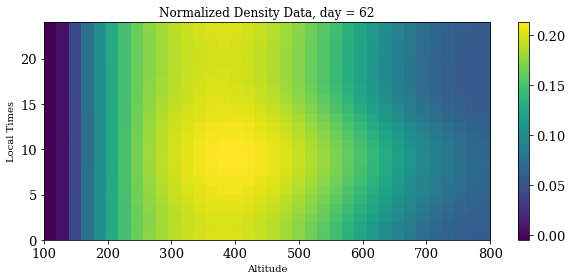

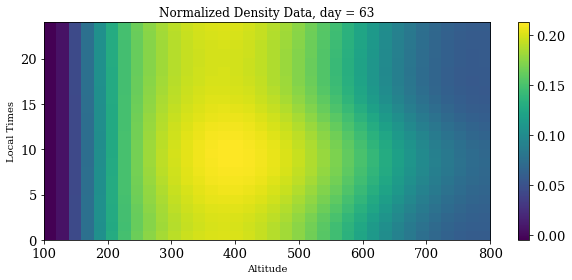

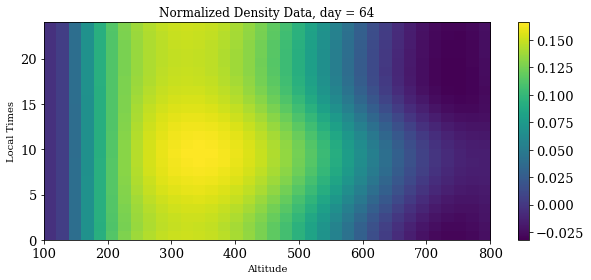

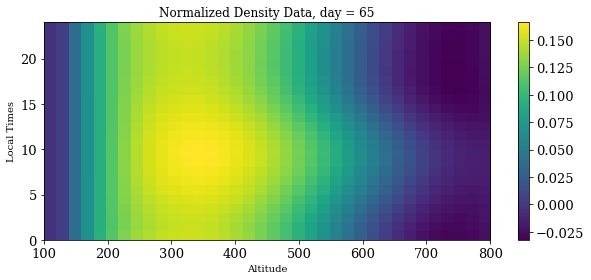

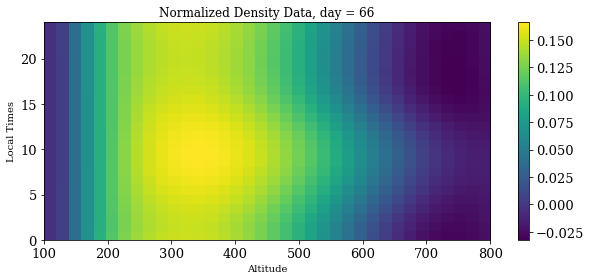

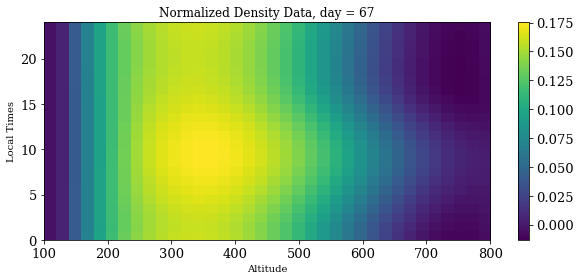

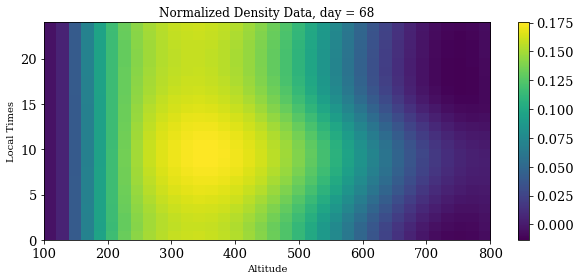

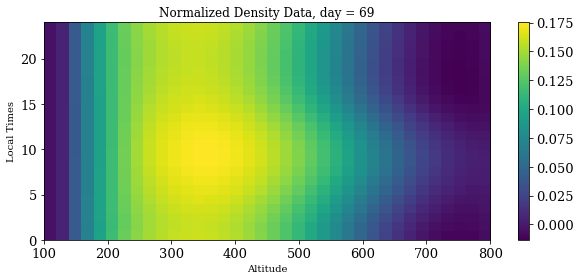

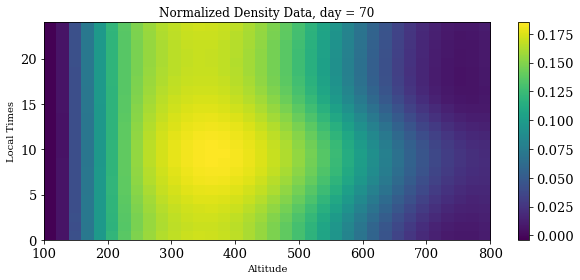

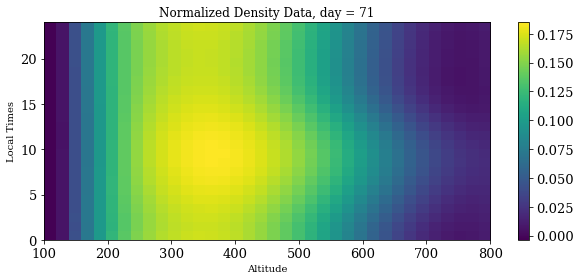

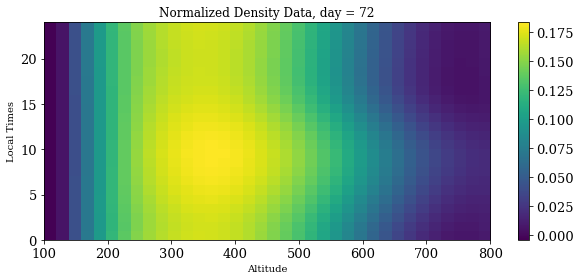

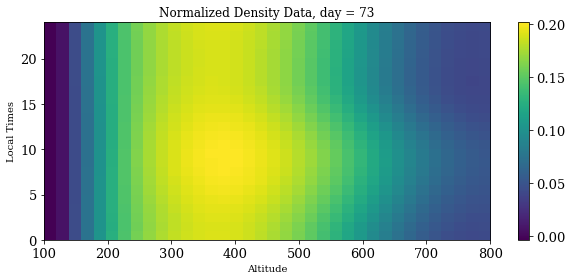

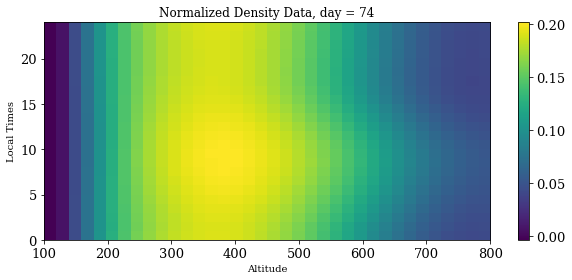

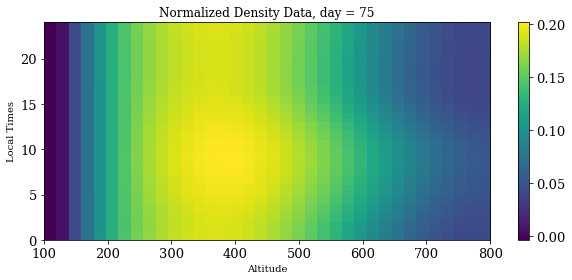

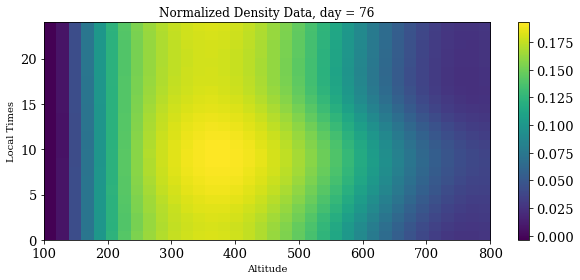

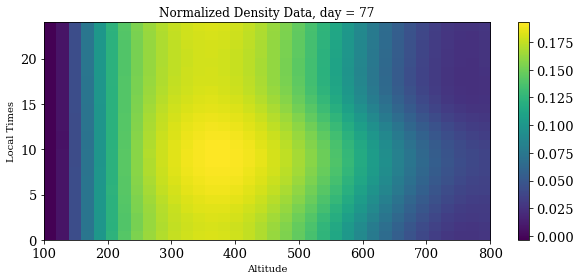

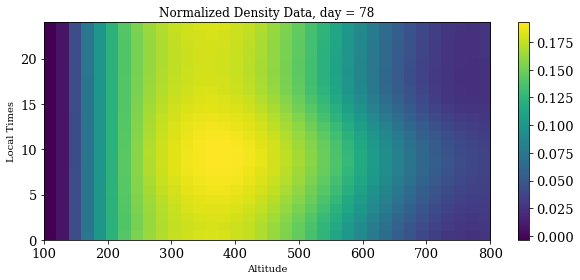

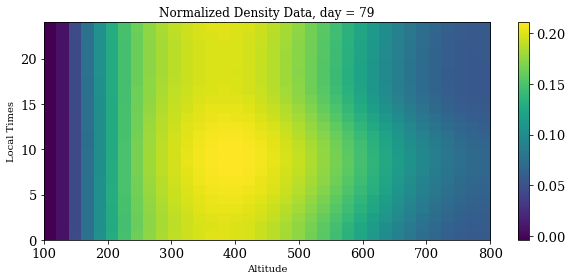

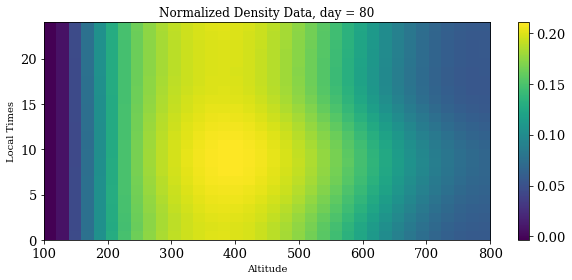

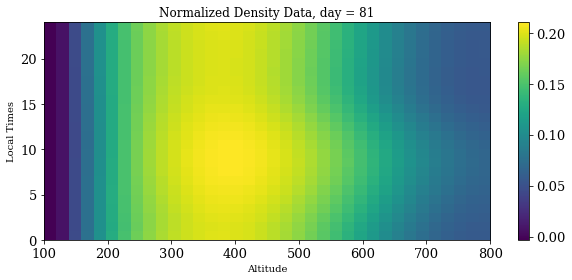

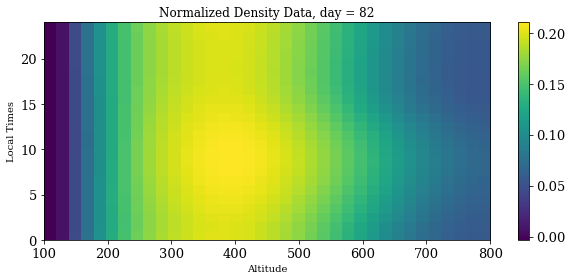

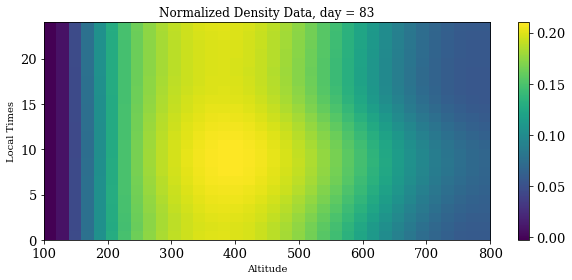

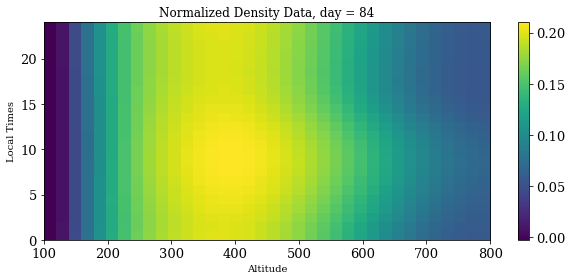

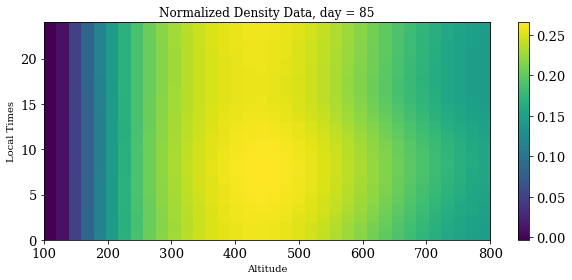

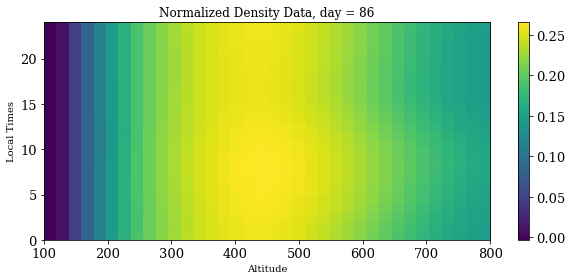

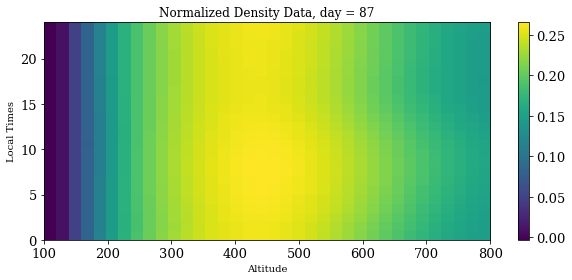

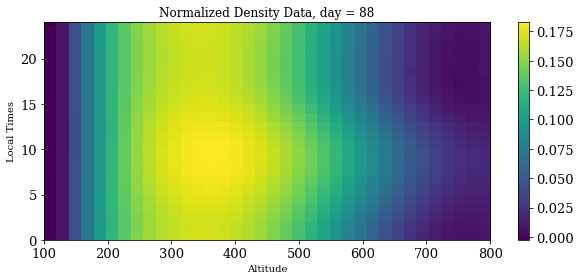

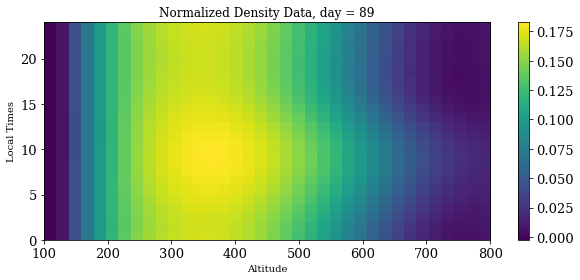

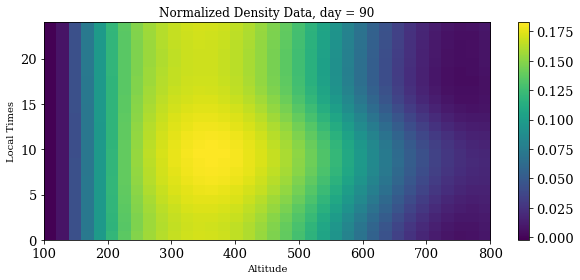

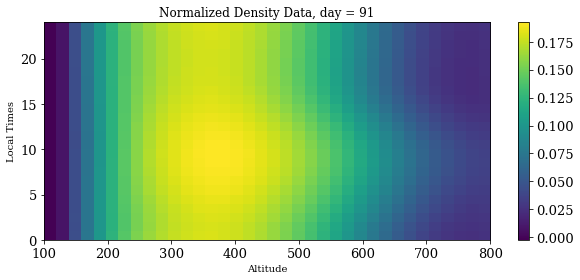

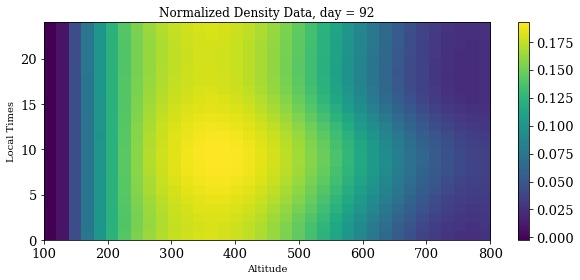

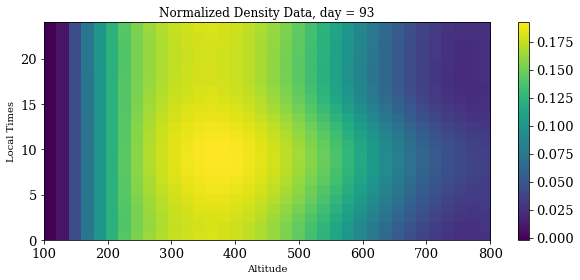

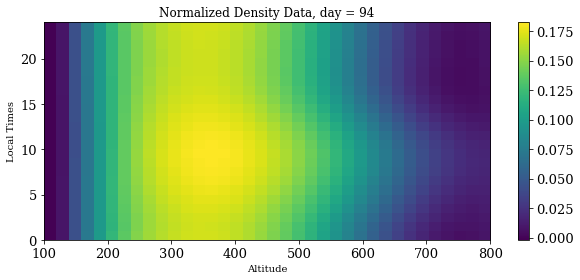

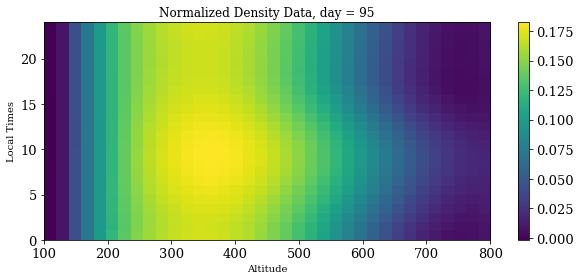

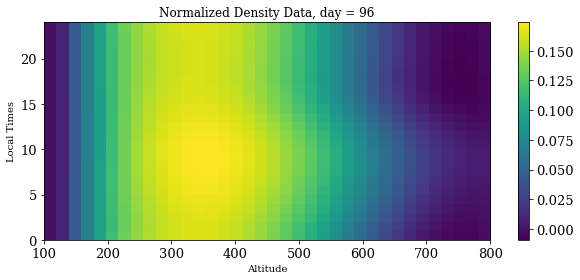

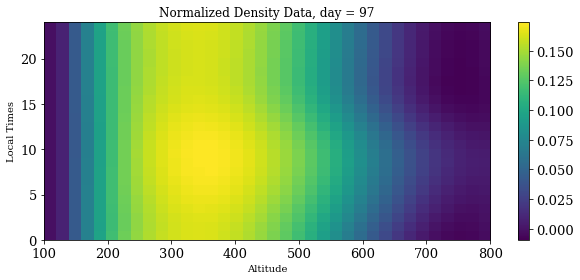

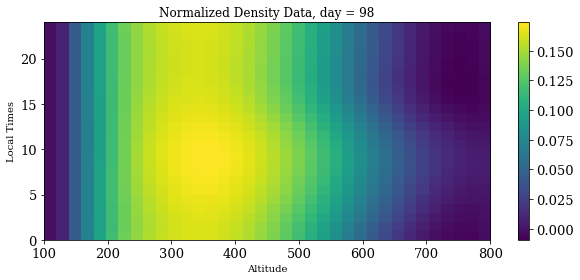

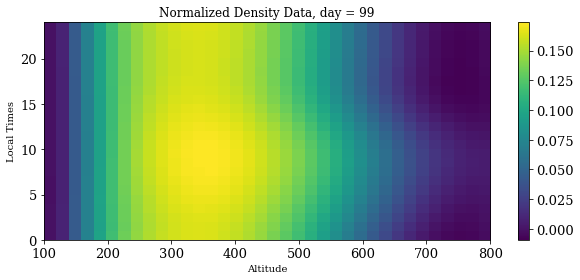

In [165]:
for kk, i in enumerate(np.arange(0,100, 1)):
    # data snapshots.
    photo = densityDataVarLog[:, kk].reshape(24,20,36, order='F')
    # plot contours. 
    fig, ax = plt.subplots(figsize=(10, 4))
    img = ax.imshow(photo[:, 1, :], extent=[altitudes[0], altitudes[-1], localSolarTimes[0], localSolarTimes[-1]], 
                   cmap="viridis", aspect="auto")
    cbar = fig.colorbar(img, ax=ax)
    ax.set_ylabel("Local Times")
    ax.set_xlabel("Altitude")
    ax.set_title('Normalized Density Data, day = {}'.format(i))
    file_name = "JB/figs/animation/fig_" + str(kk) + ".png"
    fig.savefig(file_name, dpi=300)